# FordGoBike Data Exploration
## by Islam Soliman


### Table of Content
- [Introduction](#intro)
- [Preliminary Wrangling](#preliminary)
    - [Loading Libraries](#loading)
    - [Gathering Data](#gathering)
    - [Assessing Data](#assessing)
    - [Cleaning Data](#cleaning)
    - [Storing Data](#storing)
- [Exploratory Data Analysis](#exploratory)
    - [Univariate Exploration](#univariate)
    - [Bivariate Exploration](#bivariate)
    - [Multivariate Exploration](#multivariate)
- [Explanatory Data Analysis](#explanatory)
- [Summary](#summary)
- [References](#references)


****

<a id='intro'></a>
## Introduction

Ford GoBike is the San Francisco Bay Area's bike share system. The Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes covering 70 stations across San Francisco and San Jose. It is now called **Baywheels**.

Baywheels, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24/7 all year round, and riders have access to all bikes in the network when they become a member or purchase a pass.


****

<a id='preliminary'></a>
## Preliminary Wrangling

The dataset was downloaded from [here](https://s3.amazonaws.com/baywheels-data/index.html) for `February and March 2020`, I will be joining the data files together creating a single dataset that would require data wrangling to get it ready for the analysis.

<a id='loading'></a>
## Loading Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import zipfile
import requests
import io

%matplotlib inline

<a id='gathering'></a>
## Gathering Data

In [2]:
def fetch_csv(month, year = 2020):
    '''
    This function takes two inputs (month and year) "though I made the year constant since I won't change it later"
    , uses request to get the required zip file, unzip the file, read the included CSV file
    , and finally, save the same in a datafile.
    '''
    re = requests.get(f'https://s3.amazonaws.com/baywheels-data/{year}{month}-baywheels-tripdata.csv.zip')
    zip_file = zipfile.ZipFile(io.BytesIO(re.content))
    csv_file = zip_file.open(f'{year}{month}-baywheels-tripdata.csv')
    
    df = pd.read_csv(csv_file)
    df.to_csv(f'data{month}-{year}.csv',index=False)

In [3]:
# Fetching and reading February 2020 datafile
fetch_csv('02')
# Mitigating the low_memory error by specifying Column(13) dtype
df1 = pd.read_csv('data02-2020.csv', dtype={'rental_access_method': object})
# Display the top five rows from the loaded data file
df1.head()

C:\Users\12280\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [4]:
# Fetching and reading March 2020 datafile
fetch_csv('03')
df2 = pd.read_csv('data03-2020.csv')
# Display the top five rows from the loaded data file
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


****

<a id='assessing'></a>
## Assessing Data

### Starting with February 2020 data assessment

In [5]:
# Getting the basic dataframe information, dtypes and shape
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             432354 non-null  int64  
 1   start_time               432354 non-null  object 
 2   end_time                 432354 non-null  object 
 3   start_station_id         161723 non-null  float64
 4   start_station_name       161723 non-null  object 
 5   start_station_latitude   432354 non-null  float64
 6   start_station_longitude  432354 non-null  float64
 7   end_station_id           162194 non-null  float64
 8   end_station_name         162194 non-null  object 
 9   end_station_latitude     432354 non-null  float64
 10  end_station_longitude    432354 non-null  float64
 11  bike_id                  432354 non-null  int64  
 12  user_type                432354 non-null  object 
 13  rental_access_method     317843 non-null  object 
dtypes: f

(432354, 14)

In [6]:
# Sampling the data to get a feel for the data, and understand the required cleaning
df1.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
254986,777,2020-02-10 07:14:12,2020-02-10 07:27:09,NaN,NaN,37.774516,-122.420734,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,456827,Subscriber,app
297609,808,2020-02-01 19:36:55,2020-02-01 19:50:24,NaN,NaN,37.779411,-122.480485,NaN,NaN,37.765337,-122.466497,956776,Customer,app
306557,695,2020-02-06 14:17:54,2020-02-06 14:29:30,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,NaN,NaN,37.752595,-122.420778,462918,Subscriber,app
65407,1357,2020-02-13 21:32:34.8260,2020-02-13 21:55:12.4920,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,1383,Customer,NaN
89166,529,2020-02-08 10:02:20.9190,2020-02-08 10:11:10.5510,86.0,Market St at Dolores St,37.769305,-122.426826,109.0,17th St at Valencia St,37.763316,-122.421904,2781,Customer,NaN
409549,1798,2020-02-03 22:29:49,2020-02-03 22:59:47,NaN,NaN,37.799372,-122.435897,NaN,NaN,37.765575,-122.452772,695493,Subscriber,app
419205,932,2020-02-06 08:06:41,2020-02-06 08:22:14,NaN,NaN,37.802777,-122.438295,NaN,NaN,37.792656,-122.404860,322644,Subscriber,app
123330,787,2020-02-23 13:08:46,2020-02-23 13:21:53,NaN,NaN,37.331980,-121.904197,NaN,NaN,37.344836,-121.880013,963643,Subscriber,app
68790,1016,2020-02-13 08:52:11.3420,2020-02-13 09:09:07.5930,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,196.0,Grand Ave at Perkins St,37.808894,-122.256460,3540,Customer,NaN
334327,145,2020-02-18 12:28:17,2020-02-18 12:30:43,NaN,NaN,37.785697,-122.401211,NaN,NaN,37.786941,-122.398720,392255,Subscriber,app


In [7]:
# Checking the dataframe's basic statistical information
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,432354.000000,161723.000000,432354.000000,432354.000000,162194.000000,432354.000000,432354.000000,432354.000000
mean,802.375502,174.885601,37.752000,-122.363239,167.831301,37.751563,-122.361263,366898.004772
std,1383.128099,144.087616,0.249644,0.733128,143.653096,0.286521,0.863248,300819.897178
min,60.000000,3.000000,0.000000,-122.514230,3.000000,0.000000,-122.575763,12.000000
25%,369.000000,56.000000,37.765910,-122.421264,44.000000,37.766130,-122.420628,12842.000000
50%,596.000000,126.000000,37.777288,-122.405528,120.000000,37.777429,-122.404904,355212.000000
75%,934.750000,268.000000,37.790102,-122.393572,258.000000,37.790352,-122.393547,567705.000000
max,86317.000000,512.000000,37.880222,0.000000,512.000000,37.880222,0.000000,999960.000000


In [8]:
# Checking 10 trips with the shortest duration
df1.nsmallest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
119217,60,2020-02-26 11:12:31,2020-02-26 11:13:31,296.0,5th St at Virginia St,37.325998,-121.877120,296.0,5th St at Virginia St,37.325998,-121.877120,299042,Subscriber,app
122497,60,2020-02-07 15:19:12,2020-02-07 15:20:13,NaN,NaN,37.331160,-121.868612,NaN,NaN,37.331156,-121.868626,518079,Subscriber,clipper
124418,60,2020-02-09 18:03:10,2020-02-09 18:04:11,NaN,NaN,37.332897,-121.913422,NaN,NaN,37.332381,-121.912854,642326,Subscriber,app
124746,60,2020-02-29 17:21:04,2020-02-29 17:22:05,NaN,NaN,37.333003,-121.879480,NaN,NaN,37.333025,-121.879476,575025,Subscriber,app
124857,60,2020-02-18 20:59:04,2020-02-18 21:00:04,NaN,NaN,37.333054,-121.879789,NaN,NaN,37.332821,-121.879581,715819,Subscriber,app
125398,60,2020-02-21 15:47:51,2020-02-21 15:48:52,NaN,NaN,37.333511,-121.891863,NaN,NaN,37.333496,-121.891777,408943,Subscriber,clipper
126849,60,2020-02-16 22:01:56,2020-02-16 22:02:56,NaN,NaN,37.334457,-121.876879,NaN,NaN,37.334433,-121.876889,678749,Subscriber,clipper
129699,60,2020-02-13 19:45:24,2020-02-13 19:46:25,NaN,NaN,37.336119,-121.887757,NaN,NaN,37.336171,-121.887703,237079,Subscriber,app
131556,60,2020-02-26 17:24:06,2020-02-26 17:25:06,280.0,San Fernando St at 7th St,37.337122,-121.883215,NaN,NaN,37.337091,-121.883285,197393,Subscriber,clipper
132085,60,2020-02-21 08:13:01,2020-02-21 08:14:02,309.0,San Jose City Hall,37.337391,-121.886995,309.0,San Jose City Hall,37.337391,-121.886995,174123,Subscriber,app


In [9]:
# Checking how many trips with the shortest recorded duration '60sec'
df1[df1.duration_sec == 60].count()

duration_sec               100
start_time                 100
end_time                   100
start_station_id            16
start_station_name          16
start_station_latitude     100
start_station_longitude    100
end_station_id              14
end_station_name            14
end_station_latitude       100
end_station_longitude      100
bike_id                    100
user_type                  100
rental_access_method       100
dtype: int64

In [10]:
# Checking 10 trips with the longest duration
df1.nlargest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
51618,86317,2020-02-17 11:42:26.0590,2020-02-18 11:41:03.7410,295.0,William St at 10th St,37.332794,-121.875926,294.0,Pierce Ave at Market St,37.327581,-121.884559,10643,Customer,NaN
91130,86239,2020-02-06 17:03:46.4380,2020-02-07 17:01:05.7030,486.0,Arguello Blvd at Edward St,37.778487,-122.458645,440.0,Carl St at Cole St,37.765910,-122.449257,3643,Customer,NaN
82154,84805,2020-02-09 16:37:18.0310,2020-02-10 16:10:43.9410,115.0,Jackson Playground,37.765026,-122.398773,126.0,Esprit Park,37.761634,-122.390648,9540,Customer,NaN
38157,84627,2020-02-20 10:40:59.1810,2020-02-21 10:11:26.2040,87.0,Folsom St at 13th St,37.769757,-122.415674,80.0,Townsend St at 5th St,37.775235,-122.397437,10887,Customer,NaN
66401,84252,2020-02-12 18:50:07.3260,2020-02-13 18:14:19.5050,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,3104,Customer,NaN
57284,84008,2020-02-15 15:39:15.3380,2020-02-16 14:59:24.1610,246.0,Berkeley Civic Center,37.869060,-122.270556,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1383,Customer,NaN
67124,83889,2020-02-12 17:34:09.6320,2020-02-13 16:52:19.3130,467.0,Brannan St at Colin P Kelly Jr St,37.782386,-122.391343,467.0,Brannan St at Colin P Kelly Jr St,37.782386,-122.391343,10437,Customer,NaN
99658,83845,2020-02-04 17:41:24.5800,2020-02-05 16:58:50.3570,58.0,Market St at 10th St,37.776619,-122.417385,76.0,McCoppin St at Valencia St,37.771662,-122.422423,10084,Subscriber,NaN
45960,83318,2020-02-18 18:07:42.7780,2020-02-19 17:16:21.2950,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,151,Customer,NaN
77832,83101,2020-02-10 13:08:06.4540,2020-02-11 12:13:08.1690,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,242.0,Milvia St at Derby St,37.860125,-122.269384,3134,Customer,NaN


In [11]:
# Checking any duplicated reecords
df1.duplicated().sum()

0

In [12]:
# Checking any NaN values
df1.isna().sum()
# It looks like some of the starting and ending values are NaN

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           270631
start_station_name         270631
start_station_latitude          0
start_station_longitude         0
end_station_id             270160
end_station_name           270160
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       114511
dtype: int64

In [13]:
df1.user_type.value_counts()

Subscriber    277446
Customer      154908
Name: user_type, dtype: int64

In [14]:
df1.rental_access_method.value_counts()

app        293205
clipper     24638
Name: rental_access_method, dtype: int64

### Continuing with March 2020 data assessment

In [15]:
# Getting the basic dataframe information, dtypes and shape
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

(176799, 14)

In [16]:
# Sampling the data to get a feel for the data, and understand the required cleaning
df2.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
85277,926,2020-03-05 13:34:19,2020-03-05 13:49:45,NaN,NaN,37.751233,-122.408744,81.0,Berry St at 4th St,37.775880,-122.393170,476972,Subscriber,app
146096,2668,2020-03-10 17:25:18,2020-03-10 18:09:46,NaN,NaN,37.785496,-122.488169,NaN,NaN,37.797135,-122.412022,942930,Customer,app
100097,877,2020-03-15 14:34:28,2020-03-15 14:49:05,223.0,16th St Mission BART Station 2,37.764765,-122.420091,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,913578,Subscriber,app
57980,133,2020-03-02 12:35:35.3130,2020-03-02 12:37:48.7860,78.0,Folsom St at 9th St,37.773717,-122.411647,60.0,8th St at Ringold St,37.774520,-122.409449,9592,Customer,NaN
14026,1174,2020-03-13 17:10:17.1470,2020-03-13 17:29:52.0730,467.0,Brannan St at Colin P Kelly Jr St,37.782386,-122.391343,398.0,Leavenworth St at Broadway,37.796471,-122.416858,2753,Customer,NaN
93279,795,2020-03-05 07:49:48,2020-03-05 08:03:03,123.0,Folsom St at 19th St,37.760594,-122.414817,NaN,NaN,37.787129,-122.405092,217973,Subscriber,app
5808,488,2020-03-22 15:55:13.5510,2020-03-22 16:03:22.3410,203.0,Webster St at 2nd St,37.795195,-122.273970,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,457,Customer,NaN
173715,661,2020-03-22 15:55:10,2020-03-22 16:06:12,NaN,NaN,37.803967,-122.448587,478.0,Greenwich St at Franklin St,37.800254,-122.425919,118385,Subscriber,app
89356,193,2020-03-04 21:51:28,2020-03-04 21:54:41,NaN,NaN,37.757177,-122.418356,NaN,NaN,37.764889,-122.424048,153531,Subscriber,app
81020,1057,2020-03-13 08:17:59,2020-03-13 08:35:37,NaN,NaN,37.724711,-122.437219,NaN,NaN,37.764411,-122.411283,556533,Customer,app


In [17]:
# Checking the dataframe's basic statistical information
df2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


In [18]:
# Checking 10 trips with the shortest duration
df2.nsmallest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
64029,60,2020-03-30 14:58:33,2020-03-30 14:59:34,NaN,NaN,37.315916,-121.873734,NaN,NaN,37.315981,-121.873815,147559,Customer,app
65975,60,2020-03-21 17:07:21,2020-03-21 17:08:21,NaN,NaN,37.325861,-121.877175,NaN,NaN,37.325817,-121.877241,146405,Subscriber,app
75394,60,2020-03-09 19:24:31,2020-03-09 19:25:31,NaN,NaN,37.337926,-121.894055,NaN,NaN,37.337366,-121.893877,366905,Subscriber,clipper
76567,60,2020-03-01 09:31:47,2020-03-01 09:32:47,NaN,NaN,37.339580,-121.887300,NaN,NaN,37.339273,-121.888158,759280,Subscriber,app
81151,60,2020-04-01 02:19:25,2020-04-01 02:20:25,NaN,NaN,37.726880,-122.386434,NaN,NaN,37.726869,-122.386485,187502,Subscriber,app
82021,60,2020-03-02 11:26:38,2020-03-02 11:27:39,NaN,NaN,37.739150,-122.407254,NaN,NaN,37.739144,-122.407242,393483,Customer,app
83620,60,2020-03-12 09:25:00,2020-03-12 09:26:00,NaN,NaN,37.747338,-122.411419,NaN,NaN,37.747324,-122.411417,777798,Subscriber,app
87362,60,2020-03-31 08:40:02,2020-03-31 08:41:03,NaN,NaN,37.754244,-122.418632,NaN,NaN,37.754225,-122.418699,737676,Subscriber,app
87402,60,2020-03-23 16:58:33,2020-03-23 16:59:33,NaN,NaN,37.754337,-122.402525,NaN,NaN,37.754349,-122.402498,814879,Customer,app
89326,60,2020-03-04 21:20:38,2020-03-04 21:21:38,NaN,NaN,37.757088,-122.418900,NaN,NaN,37.757145,-122.418928,921888,Subscriber,app


In [19]:
# Checking how many trips with the shortest recorded duration '60sec'
df2[df2.duration_sec == 60].count()

duration_sec               29
start_time                 29
end_time                   29
start_station_id           10
start_station_name         10
start_station_latitude     29
start_station_longitude    29
end_station_id              6
end_station_name            6
end_station_latitude       29
end_station_longitude      29
bike_id                    29
user_type                  29
rental_access_method       29
dtype: int64

In [20]:
# Checking 10 trips with the longest duration
df2.nlargest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
7463,84450,2020-03-20 10:07:18.0910,2020-03-21 09:34:48.1470,84.0,Duboce Park,37.769200,-122.433812,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,2947,Customer,NaN
11311,82608,2020-03-15 13:14:31.1470,2020-03-16 12:11:19.8850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,74.0,Laguna St at Hayes St,37.776435,-122.426244,2589,Customer,NaN
43844,82449,2020-03-03 19:53:05.7190,2020-03-04 18:47:15.4680,508.0,St. Joseph's Ave at Geary Blvd,37.782476,-122.442534,455.0,McAllister St at Arguello Blvd,37.775214,-122.458334,11396,Customer,NaN
4392,81351,2020-03-24 11:45:56.7950,2020-03-25 10:21:47.8420,178.0,Broadway at 30th St,37.819381,-122.261928,178.0,Broadway at 30th St,37.819381,-122.261928,12660,Subscriber,NaN
23142,80980,2020-03-09 19:19:48.0250,2020-03-10 17:49:28.1160,246.0,Berkeley Civic Center,37.869060,-122.270556,167.0,College Ave at Harwood Ave,37.848152,-122.252160,154,Customer,NaN
18831,78832,2020-03-10 21:57:46.2410,2020-03-11 19:51:39.1080,105.0,16th St at Prosper St,37.764285,-122.431804,411.0,Octavia Blvd at Page St,37.774018,-122.423809,13061,Customer,NaN
40027,78807,2020-03-04 18:03:38.4400,2020-03-05 15:57:05.8060,81.0,Berry St at 4th St,37.775880,-122.393170,24.0,Spear St at Folsom St,37.789677,-122.390428,9770,Customer,NaN
703,77675,2020-03-30 01:57:23.5140,2020-03-30 23:31:58.6850,369.0,Hyde St at Post St,37.787349,-122.416651,419.0,Fern St at Polk St,37.788197,-122.420373,10098,Customer,NaN
704,77592,2020-03-30 01:57:08.6270,2020-03-30 23:30:21.6170,369.0,Hyde St at Post St,37.787349,-122.416651,419.0,Fern St at Polk St,37.788197,-122.420373,11920,Customer,NaN
60474,77132,2020-03-01 02:48:35.5210,2020-03-02 00:14:08.1810,86.0,Market St at Dolores St,37.769305,-122.426826,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,11311,Customer,NaN


In [21]:
# Checking any duplicated reecords
df1.duplicated().sum()

0

In [22]:
# Checking any NaN values
df1.isna().sum()
# It looks like some of the starting and ending values are NaN

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           270631
start_station_name         270631
start_station_latitude          0
start_station_longitude         0
end_station_id             270160
end_station_name           270160
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       114511
dtype: int64

In [23]:
df1.user_type.value_counts()

Subscriber    277446
Customer      154908
Name: user_type, dtype: int64

In [24]:
df1.rental_access_method.value_counts()

app        293205
clipper     24638
Name: rental_access_method, dtype: int64

## Findings
### Tidiness Findings
    T1 "Month" column is missing in both dataframes.
    T2 Data is divided into two separate dataframes.
    T3 "Day" column with day name is missing in both dataframes.
    T4 Starting and Ending hour columns are missing in both dataframes.
    T5 Duration in seconds only delivers unclear perception of time.
    T6 There are several columns that are not required for the analysis.
### Quality Findings
    Q1 Wrong datatypes ('start_time', 'end_time', 'start_station_id', 'end_station_id', ETC..)
    Q2 Missing data records

****

<a id='cleaning'></a>
## Cleaning Data
### Creating Copies from the Dataframes

In [25]:
wrangled_df1 = df1.copy()
wrangled_df2 = df2.copy()

****
### Cleaning Tidiness Findings
### T1 "Month" column is missing in both dataframes.
### Define:
Adding a month column to both dataframes with the month name as value for easy identification.
### Code:

In [26]:
wrangled_df1['month'] = 'february'
wrangled_df2['month'] = 'march'

In [27]:
# Storing dataframes into CSV files excluding index column
wrangled_df1.to_csv('wrangled_feb.csv', index=False)
wrangled_df1.to_csv('baywheels_2020.csv', index=False) # This will be the main data file.
wrangled_df2.to_csv('wrangled_mar.csv', index=False)

### Testing:

In [28]:
wrangled_df1 = pd.read_csv('wrangled_feb.csv', dtype={'rental_access_method': object})
wrangled_df1.head()
wrangled_df1.shape

(432354, 15)

In [29]:
wrangled_df2 = pd.read_csv('wrangled_mar.csv')
wrangled_df2.head()
wrangled_df2.shape

(176799, 15)

****
### T2 Data is divided into two separate dataframes.
### Define:
Append (wrangled_mar.csv) file to (baywheels_2020.csv) excluding the header row.
### Code:

In [30]:
main_df = pd.read_csv('baywheels_2020.csv', dtype={'rental_access_method': object})
main_df = main_df.append(pd.read_csv('wrangled_mar.csv'))

### Testing:

In [31]:
main_df.info()
main_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609153 entries, 0 to 176798
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             609153 non-null  int64  
 1   start_time               609153 non-null  object 
 2   end_time                 609153 non-null  object 
 3   start_station_id         272419 non-null  float64
 4   start_station_name       273072 non-null  object 
 5   start_station_latitude   609153 non-null  float64
 6   start_station_longitude  609153 non-null  float64
 7   end_station_id           273291 non-null  float64
 8   end_station_name         273988 non-null  object 
 9   end_station_latitude     609153 non-null  float64
 10  end_station_longitude    609153 non-null  float64
 11  bike_id                  609153 non-null  int64  
 12  user_type                609153 non-null  object 
 13  rental_access_method     432112 non-null  object 
 14  mont

(609153, 15)

#### Merging data into (baywheels_2020.csv) successful with the total rows in both dataframes

****
### T3 "Day" column with day name is missing in both dataframes.
### Define:
Adding two more columns containing (start_day, end_day) obtained from (start_time, end_time) columns after converting the dtypes to datetime
### Code:

In [32]:
# Converting both 'start_time', 'end_time' dtype to datetime.
main_df[['start_time', 'end_time']] = main_df[['start_time', 'end_time']].apply(pd.to_datetime)

In [33]:
# Creating 'start_day', 'end_day' columns.
main_df.insert(3, 'start_day', main_df['start_time'].dt.day_name())
main_df.insert(4, 'end_day', main_df['end_time'].dt.day_name())

### Testing:

In [34]:
main_df.info()
main_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609153 entries, 0 to 176798
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             609153 non-null  int64         
 1   start_time               609153 non-null  datetime64[ns]
 2   end_time                 609153 non-null  datetime64[ns]
 3   start_day                609153 non-null  object        
 4   end_day                  609153 non-null  object        
 5   start_station_id         272419 non-null  float64       
 6   start_station_name       273072 non-null  object        
 7   start_station_latitude   609153 non-null  float64       
 8   start_station_longitude  609153 non-null  float64       
 9   end_station_id           273291 non-null  float64       
 10  end_station_name         273988 non-null  object        
 11  end_station_latitude     609153 non-null  float64       
 12  end_station_long

(609153, 17)

****
### T4 Starting and Ending hour columns are missing in both dataframes.
### Define:
Adding two more columns containing (start_hour, end_hour) obtained from (start_time, end_time) to use during my Univariate Exploration.
### Code:

In [35]:
main_df.insert(5, 'start_hour', main_df['start_time'].dt.hour)
main_df.insert(6, 'end_hour', main_df['end_time'].dt.hour)

### Testing

In [36]:
main_df.info()
main_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609153 entries, 0 to 176798
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             609153 non-null  int64         
 1   start_time               609153 non-null  datetime64[ns]
 2   end_time                 609153 non-null  datetime64[ns]
 3   start_day                609153 non-null  object        
 4   end_day                  609153 non-null  object        
 5   start_hour               609153 non-null  int64         
 6   end_hour                 609153 non-null  int64         
 7   start_station_id         272419 non-null  float64       
 8   start_station_name       273072 non-null  object        
 9   start_station_latitude   609153 non-null  float64       
 10  start_station_longitude  609153 non-null  float64       
 11  end_station_id           273291 non-null  float64       
 12  end_station_name

(609153, 19)

****
### T5 Duration in seconds only delivers unclear perception of time.
### Define:
Adding Minutes, Hours, and Days columns for trip duration.
### Code:

In [37]:
main_df.insert(1, 'duration_min', main_df.duration_sec/60)
main_df.insert(2, 'duration_hrs', main_df.duration_sec/3600)
main_df.insert(3, 'duration_days', main_df.duration_hrs/24)

In [38]:
main_df['duration_min'] = main_df['duration_min'].astype(int)
main_df['duration_hrs'] = main_df['duration_hrs'].astype(int)

### Testing:

In [39]:
main_df.head()

,duration_sec,duration_min,duration_hrs,duration_days,start_time,end_time,start_day,end_day,start_hour,end_hour,...,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,62083,1034,17,0.718553,2020-02-29 18:32:30.575,2020-03-01 11:47:14.085,Saturday,Sunday,18,11,...,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN,february
1,1364,22,0,0.015787,2020-02-29 23:53:53.719,2020-03-01 00:16:37.972,Saturday,Sunday,23,0,...,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN,february
2,836,13,0,0.009676,2020-02-29 23:54:03.197,2020-03-01 00:07:59.849,Saturday,Sunday,23,0,...,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN,february
3,1004,16,0,0.011620,2020-02-29 23:48:34.648,2020-03-01 00:05:19.202,Saturday,Sunday,23,0,...,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN,february
4,1007,16,0,0.011655,2020-02-29 23:48:25.900,2020-03-01 00:05:13.449,Saturday,Sunday,23,0,...,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN,february


****
### T6 There are several columns that are not required for the analysis.
### Define:
Delete unrequired columns ('start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude')
### Code:

In [40]:
main_df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

### Testing:

In [41]:
main_df.info()
main_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609153 entries, 0 to 176798
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          609153 non-null  int64         
 1   duration_min          609153 non-null  int32         
 2   duration_hrs          609153 non-null  int32         
 3   duration_days         609153 non-null  float64       
 4   start_time            609153 non-null  datetime64[ns]
 5   end_time              609153 non-null  datetime64[ns]
 6   start_day             609153 non-null  object        
 7   end_day               609153 non-null  object        
 8   start_hour            609153 non-null  int64         
 9   end_hour              609153 non-null  int64         
 10  start_station_id      272419 non-null  float64       
 11  start_station_name    273072 non-null  object        
 12  end_station_id        273291 non-null  float64       
 13 

(609153, 18)

****

## Cleaning Quality Findings
### Q1 Wrong datatypes ('start_time', 'end_time', 'start_station_id', 'end_station_id', ETC..)
### Define
Converting 'start_station_id', 'end_station_id', 'bike_id' to string since there won't have any operations performed on them, and 'user_type', 'rental_access_method' to category.
<br>**Note:** start_time, end_time had been converted to datetime at T3.
### Code:

In [42]:
main_df[['start_station_id', 'end_station_id', 'bike_id']] = main_df[['start_station_id', 'end_station_id', 'bike_id']].astype(str)
main_df[['user_type', 'rental_access_method']] = main_df[['user_type', 'rental_access_method']].astype('category')

### Testing:

In [43]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609153 entries, 0 to 176798
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          609153 non-null  int64         
 1   duration_min          609153 non-null  int32         
 2   duration_hrs          609153 non-null  int32         
 3   duration_days         609153 non-null  float64       
 4   start_time            609153 non-null  datetime64[ns]
 5   end_time              609153 non-null  datetime64[ns]
 6   start_day             609153 non-null  object        
 7   end_day               609153 non-null  object        
 8   start_hour            609153 non-null  int64         
 9   end_hour              609153 non-null  int64         
 10  start_station_id      609153 non-null  object        
 11  start_station_name    273072 non-null  object        
 12  end_station_id        609153 non-null  object        
 13 

****

<a id='storing'></a>
## Storing Data

In [44]:
main_df.to_csv('wrangled_baywheels_2020.csv', index=False)

### What is the structure of your dataset?

> The data is straightforward to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from.
<br><br>This notebook uses data collected from February and March 2020. There are approximately 609,153 bike rides.
<br><br>The column header descriptions are as follows (each trip is anonymized):<br>
><ul>
  <li>Trip Duration (seconds)
  <ul>
  <li>Start Time and Date
  <li>End Time and Date
  </ul>
  <li>Start Station ID
  <ul>    
  <li>Start Station Name
  <li>Start Station Latitude
  <li>Start Station Longitude
  </ul>
  <li>End Station ID
  <ul>
  <li>End Station Name
  <li>End Station Latitude
  <li>End Station Longitude
  </ul>
  <li>Bike ID
  <li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
  <li>Rental Method (App or Clipper)
 </ul>     
<br>I added the following columns in my cleaning efforts:<br>
><ul>
  <li>Trip Duration (Minutes)
  <li>Trip Duration (Hours)
  <li>Trip Duration (Days)
  <li>Start Day of the Week
  <li>End Day of the Week
  <li>ٍStart Hour
  <li>End Hour
  <li>Month
 </ul>

### What is/are the main feature(s) of interest in your dataset?

> The main features of interests in the data are the start and end time of a ride. This can be used to find out when bikes are in high or low demand. There is also data related to the users of the service whether they are a paying member or a casual user. These features can be used to make business decisions such as which day of the week bikes are mostly available and if there is any increament in bikes numbers is required.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be utilized heavily. I will also use the customer related data to understand the user-driven data behind each ride.
****

<a id='exploratory'></a>
## Exploratory Data Analysis

<a id='univariate'></a>
## Univariate Exploration

In [45]:
wrangled_df = pd.read_csv('wrangled_baywheels_2020.csv', dtype={'rental_access_method': object})
wrangled_df.head()

,duration_sec,duration_min,duration_hrs,duration_days,start_time,end_time,start_day,end_day,start_hour,end_hour,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
0,62083,1034,17,0.718553,2020-02-29 18:32:30.575,2020-03-01 11:47:14.085,Saturday,Sunday,18,11,176.0,MacArthur BART Station,267.0,Derby St at College Ave,1993,Customer,NaN,february
1,1364,22,0,0.015787,2020-02-29 23:53:53.719,2020-03-01 00:16:37.972,Saturday,Sunday,23,0,375.0,Grove St at Masonic Ave,506.0,7th Ave at Clement St,12402,Customer,NaN,february
2,836,13,0,0.009676,2020-02-29 23:54:03.197,2020-03-01 00:07:59.849,Saturday,Sunday,23,0,375.0,Grove St at Masonic Ave,454.0,7th Ave at Cabrillo St,2302,Customer,NaN,february
3,1004,16,0,0.011620,2020-02-29 23:48:34.648,2020-03-01 00:05:19.202,Saturday,Sunday,23,0,179.0,Telegraph Ave at 27th St,200.0,2nd Ave at E 18th St,902,Customer,NaN,february
4,1007,16,0,0.011655,2020-02-29 23:48:25.900,2020-03-01 00:05:13.449,Saturday,Sunday,23,0,179.0,Telegraph Ave at 27th St,200.0,2nd Ave at E 18th St,11578,Customer,NaN,february


In [46]:
wrangled_df.describe()

,duration_sec,duration_min,duration_hrs,duration_days,start_hour,end_hour,start_station_id,end_station_id,bike_id
count,609153.000000,609153.000000,609153.000000,609153.000000,609153.000000,609153.000000,272419.000000,273291.000000,609153.000000
mean,819.561811,13.168206,0.024565,0.009486,13.680409,13.849622,179.028959,172.470831,356779.129739
std,1426.987690,23.784650,0.354366,0.016516,4.769390,4.796525,148.553357,147.992458,304099.255058
min,60.000000,1.000000,0.000000,0.000694,0.000000,0.000000,3.000000,3.000000,12.000000
25%,371.000000,6.000000,0.000000,0.004294,9.000000,10.000000,58.000000,49.000000,12445.000000
50%,598.000000,9.000000,0.000000,0.006921,14.000000,15.000000,125.000000,120.000000,344717.000000
75%,942.000000,15.000000,0.000000,0.010903,17.000000,18.000000,284.000000,271.000000,561777.000000
max,86317.000000,1438.000000,23.000000,0.999039,23.000000,23.000000,521.000000,521.000000,999960.000000


In [47]:
base_color = sb.color_palette()[0] # Removing the colours and setting to the variable base_color
sb.set_style("darkgrid")

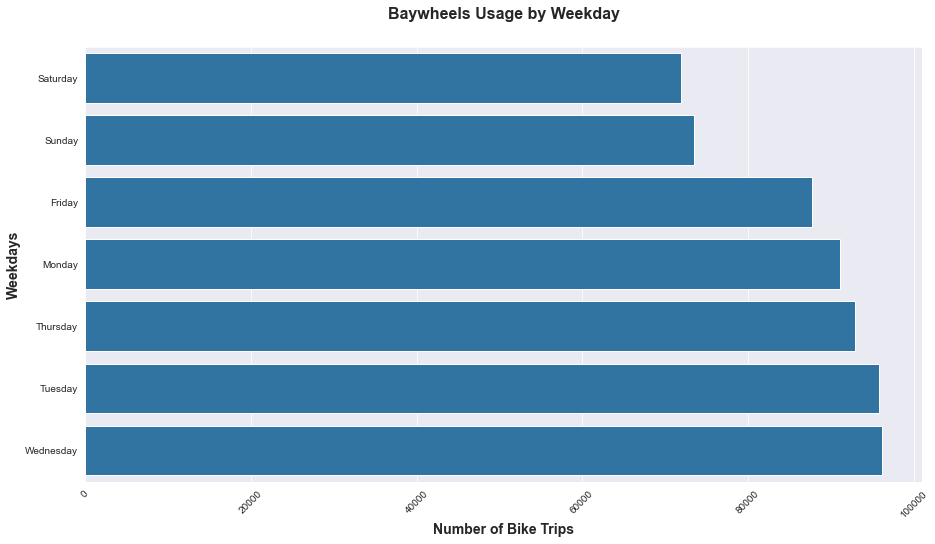

In [48]:
# Usage of Baywheels system during Weekday
plt.figure(figsize=[15, 8])
weekday = wrangled_df['start_day'].value_counts(ascending=True).index # Reversing the current order
sb.countplot(data = wrangled_df, y = 'start_day', color = base_color, order = weekday)
plt.title('Baywheels Usage by Weekday', y=1.05, fontsize=16, fontweight='bold')
plt.ylabel('Weekdays', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bike Trips', fontsize=14, fontweight='bold')
plt.xticks(rotation=45);

#### Maximum trips were started on `Wednesday`.

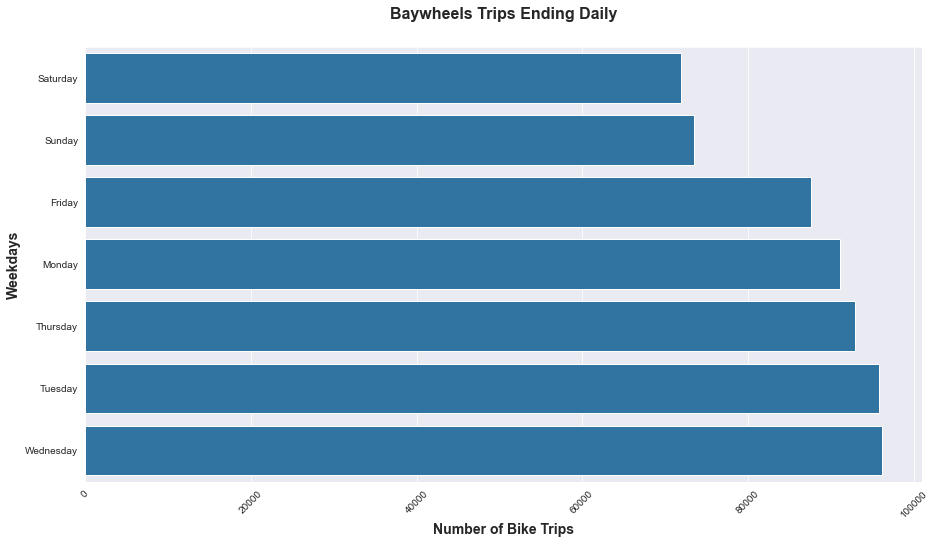

In [49]:
# Usage of Baywheels system during Weekday
plt.figure(figsize=[15, 8])
weekday = wrangled_df['end_day'].value_counts(ascending=True).index # Reversing the current order
sb.countplot(data = wrangled_df, y = 'end_day', color = base_color, order = weekday)
plt.title('Baywheels Trips Ending Daily', y=1.05, fontsize=16, fontweight='bold')
plt.ylabel('Weekdays', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bike Trips', fontsize=14, fontweight='bold')
plt.xticks(rotation=45);

#### Maximum trips were ended on `Wednesday`.

In [50]:
wrangled_df.start_day.value_counts()

Wednesday    96219
Tuesday      95875
Thursday     92967
Monday       91071
Friday       87698
Sunday       73448
Saturday     71875
Name: start_day, dtype: int64

In [51]:
wrangled_df.end_day.value_counts()

Wednesday    96218
Tuesday      95867
Thursday     92949
Monday       91094
Friday       87578
Sunday       73540
Saturday     71907
Name: end_day, dtype: int64

**Observation 1:** `Wednesdays and Tuesdays` seem to be the most popular days for using the baywheels system, however `Thursdays, Mondays and Fridays` are very close in numbers.<br>The usage drops significantly on `Saturdays and Sundays` indicating the baywheels system is used primarily for commuting purposes during working days.
****

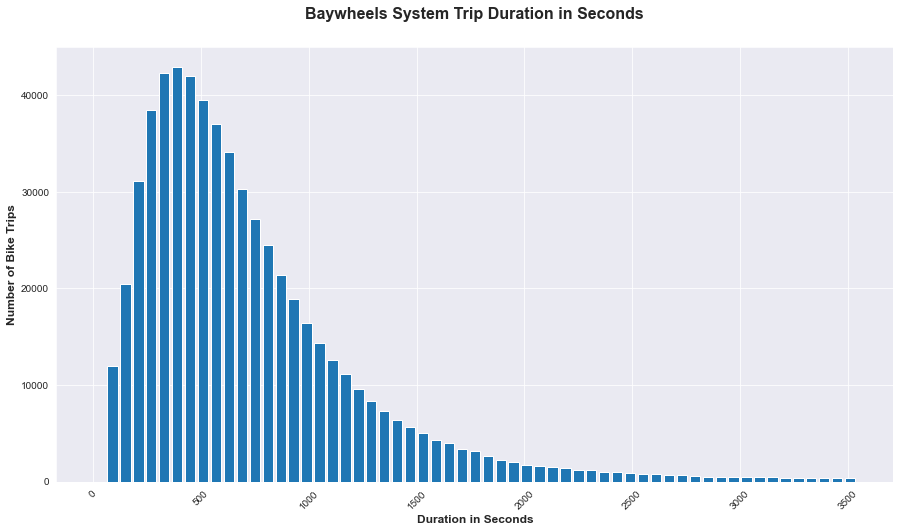

In [52]:
# Checking the duration of trips in SECONDS
plt.figure(figsize=[15, 8])
bin_edges = np.arange(0, 3600, 60) # Adjusting the axis to clearly see most data points.

plt.hist(data = wrangled_df, x = 'duration_sec', bins = bin_edges, rwidth = 0.8,  color = base_color);
plt.title("Baywheels System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration in Seconds', fontsize=12, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=12, fontweight='bold')
plt.xticks(rotation=45);

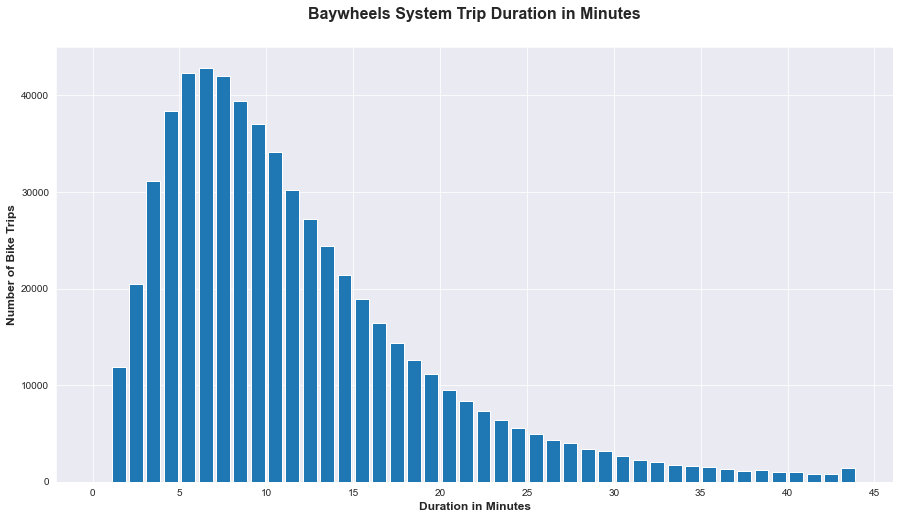

In [53]:
# Checking the duration of trips in minutes
plt.figure(figsize=[15, 8])
bin_edges = np.arange(0, 45, 1) 
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
lables = ['{}'.format(val) for val in ticks]

plt.hist(data = wrangled_df, x = 'duration_min', bins = bin_edges, rwidth = 0.8,  color = base_color)
plt.title('Baywheels System Trip Duration in Minutes', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration in Minutes', fontsize=12, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=12, fontweight='bold')
plt.xticks(ticks, lables);

In [54]:
wrangled_df.duration_min.describe()

count    609153.000000
mean         13.168206
std          23.784650
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1438.000000
Name: duration_min, dtype: float64

**Observation 2:** The `average trip` is just under `13.5 minutes`, with `75%` of trips being under `15 minutes`. Looking at the histogram, most rides fall in between the `3 - 13 minute range`.<br>This suggests riders are using the bikes for short distances.
****

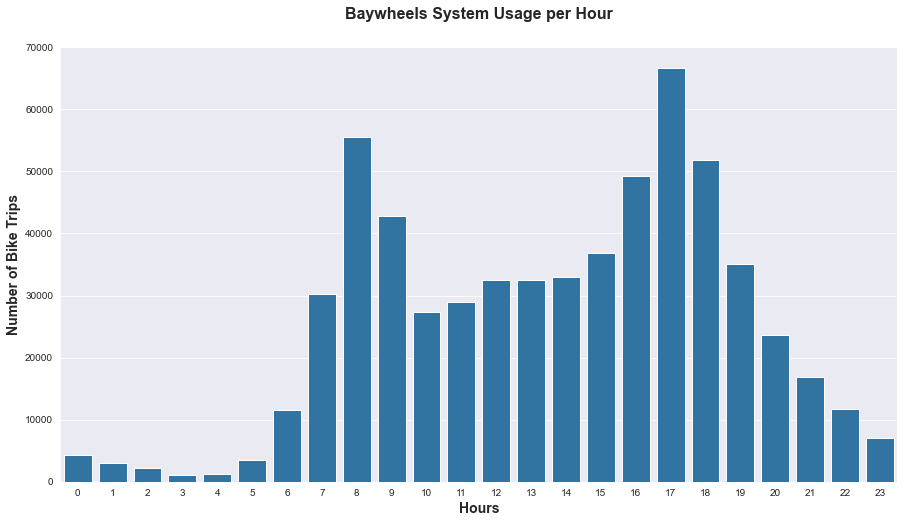

In [55]:
plt.figure(figsize=[15, 8])
sb.countplot(data = wrangled_df, x = 'start_hour', color = base_color)
plt.title('Baywheels System Usage per Hour', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Hours', fontsize=14, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=14, fontweight='bold');

**Observation 3:** The bikes saw the most usage during the `morning` hours of `8 - 9am`, and in the `afternoon` hours of `4 - 6pm`, which is a typical workday.<br>This furthers the suggestion that the bikes are being used primarily for commuters.
****

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Due to thorough data cleaning efforts there were no big surprises during the exploratory analysis and visualization phase.<br>There is no need for transformations to provide good insights.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the ordinary for a bike sharing system in a major city. So far, the data reveals that the primary use for the system falls during working days mainly for daily commutes.

****

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

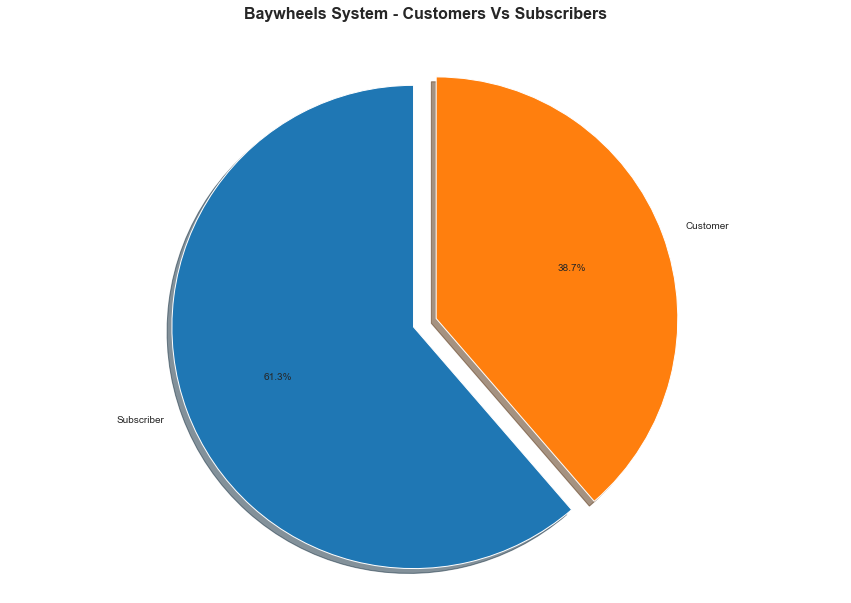

In [56]:
# Customers vs Subscribers
plt.figure(figsize = [15, 10])
labls = wrangled_df["user_type"].value_counts().index
explode = (0.1, 0)

plt.pie(wrangled_df["user_type"].value_counts(), explode=explode, labels=labls, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Baywheels System - Customers Vs Subscribers', y=1.05, fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

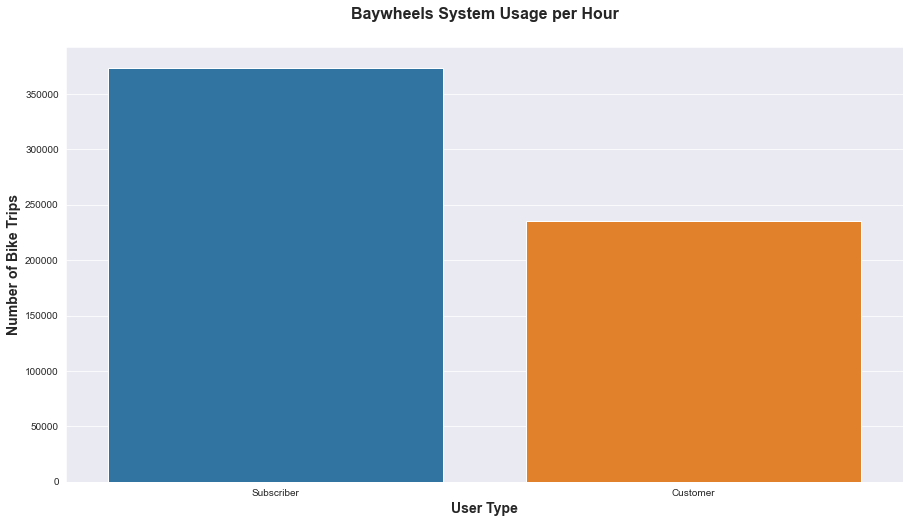

In [57]:
# Customers vs Subscribers Usage per Hour
plt.figure(figsize=[15, 8])
sb.countplot(data = wrangled_df, x = "user_type", order = wrangled_df.user_type.value_counts().index)
plt.title('Baywheels System Usage per Hour', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=14, fontweight='bold');

In [58]:
wrangled_df.user_type.value_counts()

Subscriber    373708
Customer      235445
Name: user_type, dtype: int64

**Observation 1:** The majority of users of the Baywheels Bike System are `Subscribers 61.3%` i.e. customers who subscribe to the monthly membership. While `customers` who pays by trip are `38.7%`.
****

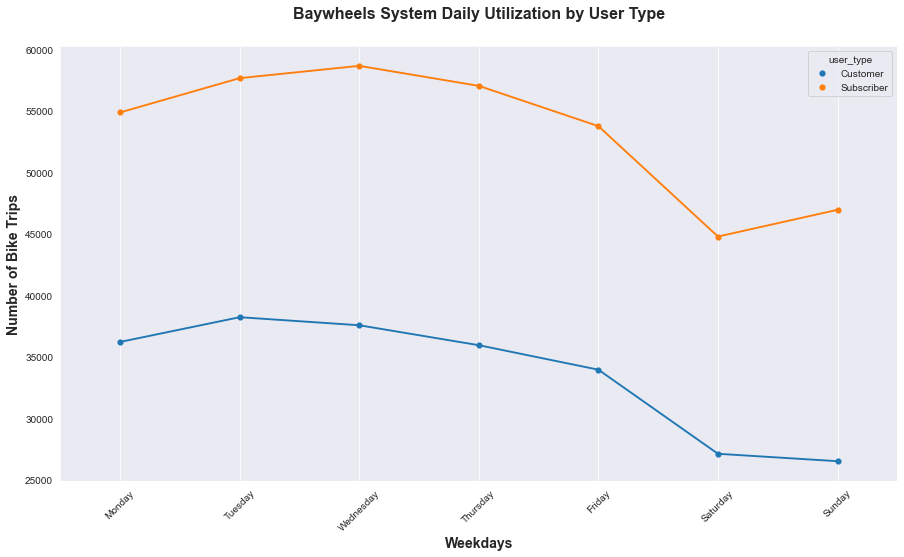

In [59]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(15, 8))

wrangled_df_user_week = wrangled_df.groupby(['start_day', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=wrangled_df_user_week, x='start_day', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Baywheels System Daily Utilization by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays', fontsize=14, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=14, fontweight='bold')
plt.xticks(rotation=45);
plt.grid()

**Observation 2:** The point plot above is an excellent visual showing the *sharp contrast* between `Customers and Subscribers`.
<br>`Customers` have a relatively *`low usage`* of the Baywheels system with a sharp decline on the weekends.
<br>`Subscribers` are the opposite, there is a steadily *`high usage`* on weekdays, with a minute increase on the weekend.
****

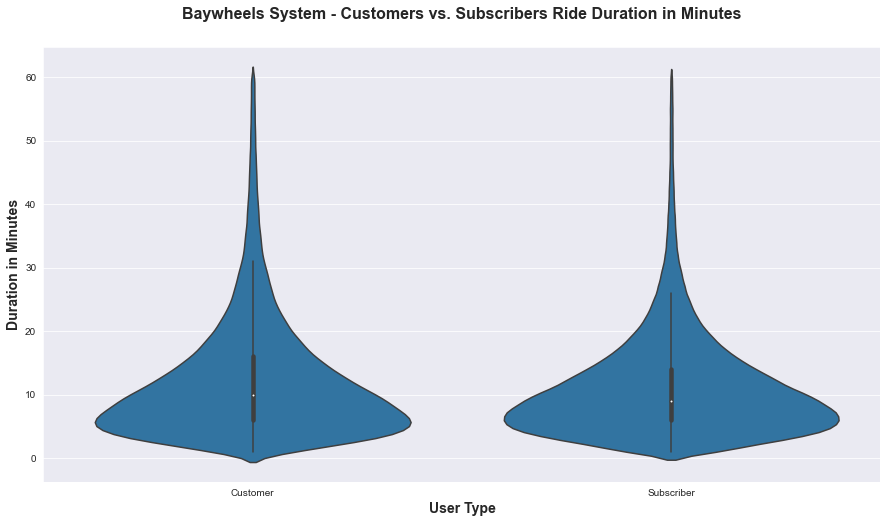

In [60]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

plt.figure(figsize=(15, 8))
data = wrangled_df.query('duration_min <= 60')

sb.violinplot(data=data, x='user_type', y='duration_min', color = base_color)

plt.title('Baywheels System - Customers vs. Subscribers Ride Duration in Minutes', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=14, fontweight='bold')
plt.ylabel('Duration in Minutes', fontsize=14, fontweight='bold');

**Observation 3:** The plots above show the ride duration spread in minutes.
<br>Both `customers and subscribers` have used the Bike sharing system almost *`equal`* in duration, less than or equal to 60 minutes.
****

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between **`customers and subscribers`**. The data suggests that **customers** are *`casual riders`* such as tourists, or students on a school vacation or holiday.
<br>This is accurate when factoring in that **`Customer`** usage increases on the weekends.
<br>In contrast, the data suggests **Subscribers** are *`daily commuters`* or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day `(8-9am and 4-6pm)`.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is almost no difference in the trip duration between **`customers and subscribers`**.
<br>**Customers** trips are slightly longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area.
<br>**Subscribers** uses the system mainly for commuting purposes so they prefer quick, short rides to and from work.

****

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

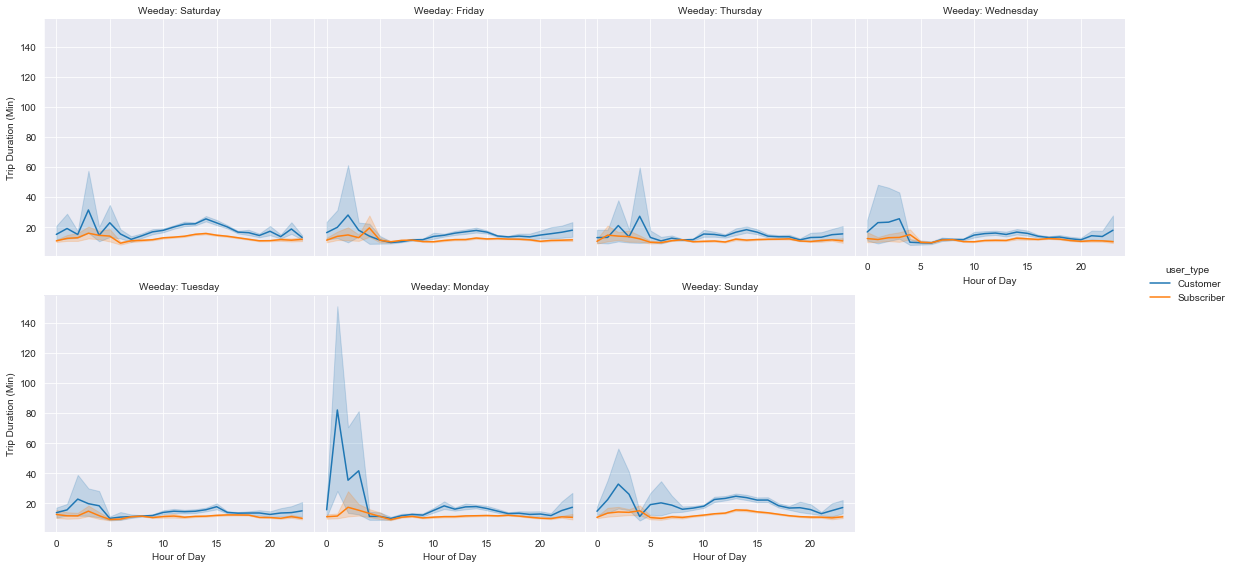

In [61]:
# Plotting hours, day type, user type, and average duration
g = sb.relplot(
    kind="line", data=wrangled_df, x="start_hour", y="duration_min", 
    estimator=np.mean, hue="user_type", col="start_day", 
    height=4, aspect=1, col_wrap=4,
)

(g.set_axis_labels("Hour of Day", "Trip Duration (Min)")
  .set_titles("Weeday: {col_name}")
  .tight_layout(w_pad=0));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration by adding in more variables to compare with other variables, each user group uses the bike sharing system.<br>As previously noted, Customers use the system at almost the same time as the Subscribers.

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here. It was interesting to note the sharp difference for customer vs. subscribers vs. Trip Duration during the mornign hours the begining of the Week (Monday). This may be a potential loss of possible Customers converting to Subscribers.

***
### Summary
This project is a *win - win situation* where the company and a large number of people can benefit from this program:

- **Subscribers** `61.3%` (i.e. daily commuters) benefit from a healthy commuting choice.
- **Customers** `38.7%` (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- The use of the service peaks mainly at `08:00AM` and `05:00PM`. This is due to work and school times in the United States.
- **Weekdays** shows *`more demand`* for the service, while **weekends** witness the *`lowest utilisation`* of service.
- The majority of **trip duration** falls between *`20 minutes or less`*.
- The busiest day of week is **Monday**.
- The **average** subscriber **trip duration** is about *`10 minutes`* and it seems to be fixed within that range without major fluctuations.
- The **variation** for *`customers`* tends to be more that that of *`subscribers`*.
***

### Sources
- [Data Files](https://s3.amazonaws.com/baywheels-data/index.html)
- [Kimberly Fessel - YouTube](https://www.youtube.com/channel/UCirb0k3PnuQnRjh8tTJHJuA)
- [Corey Schafer - YouTube](https://www.youtube.com/c/Coreyms)
- [Matplotlib Official Cheat Sheets](https://matplotlib.org/cheatsheets/)
- [Seaborn Official Documentation](https://seaborn.pydata.org/index.html)
- [Pandas for Everyone](https://www.amazon.com/Pandas-Everyone-Analysis-Addison-Wesley-Analytics-ebook/dp/B0789WKTKJ/ref=pd_sim_2/141-0065686-7219252?pd_rd_w=g9ByO&pf_rd_p=6caf1c3a-a843-4189-8efc-81b67e85dc96&pf_rd_r=CF17Y9MQYSH3JF49KJVZ&pd_rd_r=712655ce-1880-4f4c-8d98-46fb45fe7dd9&pd_rd_wg=5IlzT&pd_rd_i=B0789WKTKJ&psc=1)
- [Hands On Data Analysis with Pandas](https://www.amazon.com/Hands-Data-Analysis-Pandas-visualization-ebook/dp/B07KJQN1CC/ref=pd_sim_3/141-0065686-7219252?pd_rd_w=g9ByO&pf_rd_p=6caf1c3a-a843-4189-8efc-81b67e85dc96&pf_rd_r=CF17Y9MQYSH3JF49KJVZ&pd_rd_r=712655ce-1880-4f4c-8d98-46fb45fe7dd9&pd_rd_wg=5IlzT&pd_rd_i=B07KJQN1CC&psc=1)

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])

1